In [1]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

# Analysis w/o time cut (*on SlicedDetections*)

In [3]:
init = time.time()
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Neutrons_VariousConfig_08_20_2020", "Neutrons_Sliced")

fileinprefix = "SlicedDetections*WholeCylinder*.csv"
df_ar41_wholecylinder = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_wholecylinder = df_ar41_wholecylinder[df_ar41_wholecylinder.columns[:-1]]

fileinprefix = "SlicedDetections*RestrictedCylinder*.csv"
df_ar41_ROIcylinder = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_ROIcylinder = df_ar41_ROIcylinder[df_ar41_ROIcylinder.columns[:-1]]

fileinprefix = "SlicedDetections*100mmCylinder_S*.csv"
df_ar41_100cylinder = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_100cylinder = df_ar41_100cylinder[df_ar41_100cylinder.columns[:-1]]

fileinprefix = "SlicedDetections*100mmCylinder_01MeV*.csv"
df_ar41_100cylinder_01Mev = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_100cylinder_01Mev = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.columns[:-1]]

fileinprefix = "SlicedDetections*NeutronsGS*.csv"
df_ar41_nGS = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_nGS = df_ar41_nGS[df_ar41_nGS.columns[:-1]]

print("[Info] Loaded data in {:.3f} seconds".format(time.time() - init))

[Info] Loading 1 files wt prefix:
SlicedDetections*WholeCylinder*.csv

[Info] Loading 1 files wt prefix:
SlicedDetections*RestrictedCylinder*.csv

[Info] Loading 1 files wt prefix:
SlicedDetections*100mmCylinder_S*.csv

[Info] Loading 1 files wt prefix:
SlicedDetections*100mmCylinder_01MeV*.csv

[Info] Loading 4 files wt prefix:
SlicedDetections*NeutronsGS*.csv
.

KeyboardInterrupt: 

In [ ]:
nevents_detected_wholecylinder = df_ar41_wholecylinder[df_ar41_wholecylinder.pedetected>0].eventnumber.nunique()
nevents_detected_ROIcylinder = df_ar41_ROIcylinder[df_ar41_ROIcylinder.pedetected>0].eventnumber.nunique()
nevents_detected_100cylinder = df_ar41_100cylinder[df_ar41_100cylinder.pedetected>0].eventnumber.nunique()
nevents_detected_100cylinder_01Mev = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.pedetected>0].eventnumber.nunique()
#nevents_detected_nGS = df_ar41_nGS[df_ar41_nGS.pedetected>0].eventnumber.nunique()

In [ ]:
print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("whole", "0-7 MeV", nevents_detected_wholecylinder))
print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("ROI", "0-20 MeV", nevents_detected_ROIcylinder))
print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("100mm", "0-20 MeV", nevents_detected_100cylinder))
print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("100mm", "0-1 MeV", nevents_detected_100cylinder_01Mev))
#print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("LAr", "neutronsGS", nevents_detected_nGS))

In [ ]:
plt.bar([1, 2, 3, 4, 5], [nevents_detected_wholecylinder/df_ar41_wholecylinder.eventnumber.nunique(), 
                       nevents_detected_ROIcylinder/df_ar41_ROIcylinder.eventnumber.nunique(),
                       nevents_detected_100cylinder/df_ar41_100cylinder.eventnumber.nunique(),
                       nevents_detected_100cylinder_01Mev/df_ar41_100cylinder_01Mev.eventnumber.nunique(), 
                       nevents_detected_nGS/df_ar41_nGS.eventnumber.nunique()])
plt.xticks([1, 2, 3, 4, 5], ["Whole Cylinder, 0-7 MeV",
                          "ROI Cylinder, 0-20 MeV",
                          "100mm Cyl, 0-20 MeV",
                          "100mm Cyl, 0-1 MeV",
                          "NeutronsGS, R=2m, H=4m"])
plt.title("Fraction of detected events - Various configurations")
plt.ylabel("Fraction of detected events (w/o time cut)")
plt.show()

In [ ]:
bins = np.linspace(0, 30000, 500)
plt.hist(df_ar41_wholecylinder.groupby("eventnumber").energydeposition.sum(), bins=bins, density=True)
plt.hist(df_ar41_ROIcylinder.groupby("eventnumber").energydeposition.sum(), bins=bins, density=True)
plt.hist(df_ar41_100cylinder.groupby("eventnumber").energydeposition.sum(), bins=bins, density=True)
plt.hist(df_ar41_100cylinder_01Mev.groupby("eventnumber").energydeposition.sum(), bins=bins, density=True)
plt.hist(df_ar41_nGS.groupby("eventnumber").energydeposition.sum(), bins=bins, density=True)

plt.show()

In [14]:
df_ar41_nGS.groupby("eventnumber").energydeposition.sum().describe()

count    1.491000e+03
mean     2.860773e+05
std      8.024968e+05
min      8.244484e-01
25%      1.259222e+04
50%      5.178781e+04
75%      2.341602e+05
max      6.826667e+06
Name: energydeposition, dtype: float64

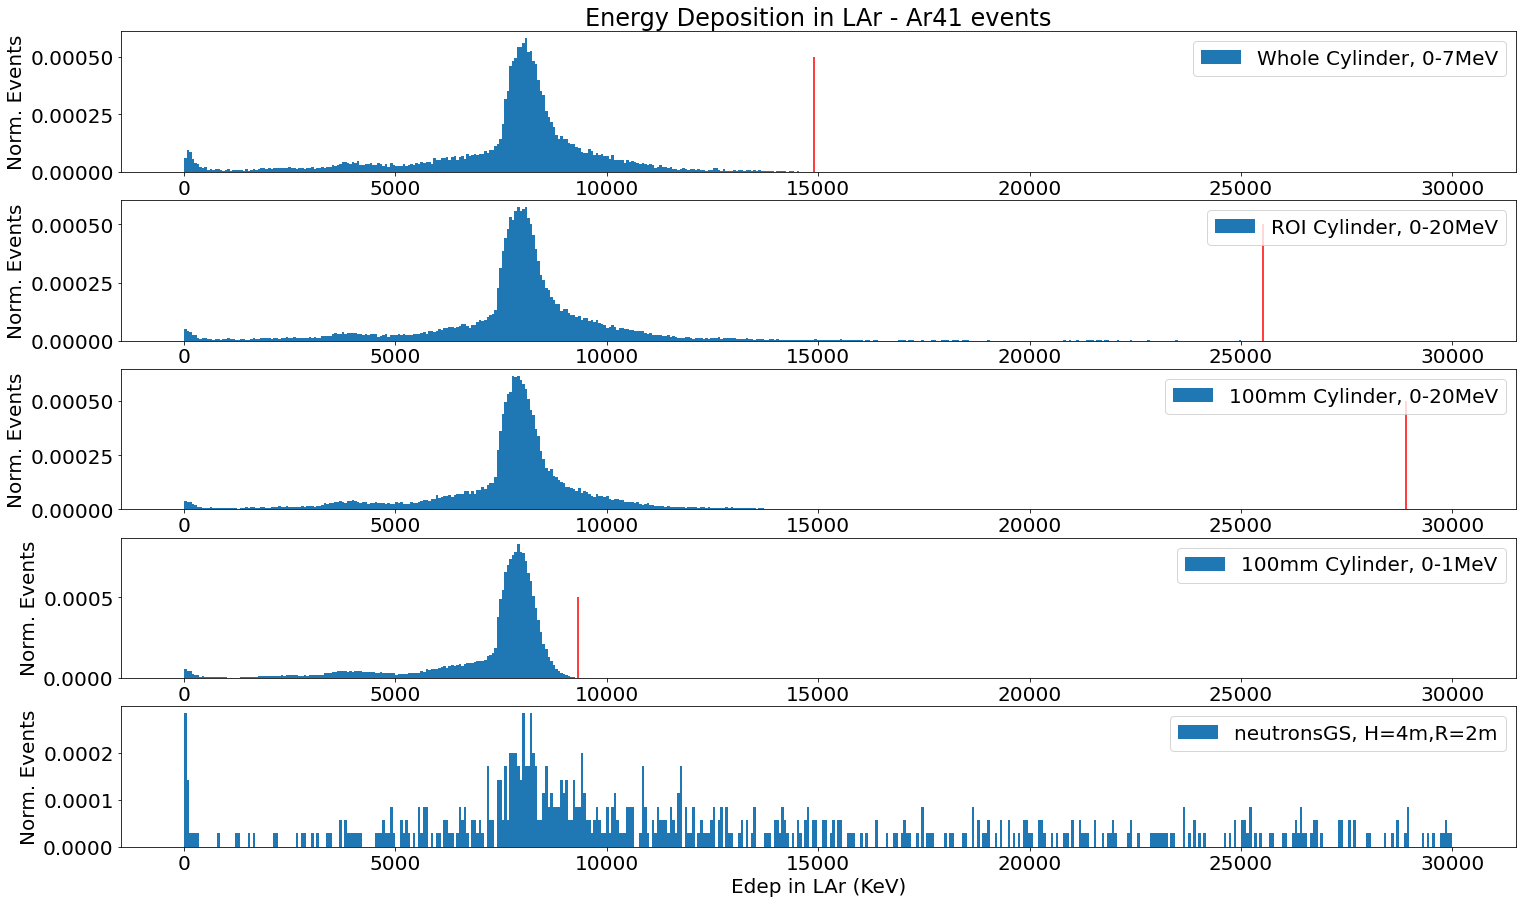

In [15]:
bins = np.linspace(0, 30000, 500)
alpha=1
plt.subplot(5, 1, 1)
plt.title("Energy Deposition in LAr - Ar41 events")
plt.hist(df_ar41_wholecylinder.groupby("eventnumber").energydeposition.sum(), bins=bins, label="Whole Cylinder, 0-7MeV", alpha=alpha, density=True)
plt.vlines(df_ar41_wholecylinder.groupby("eventnumber").energydeposition.sum().max(), 0, .0005, color='r')
plt.legend()
plt.ylabel("Norm. Events")
plt.xlabel("Edep in LAr (KeV)")

plt.subplot(5, 1, 2)
plt.hist(df_ar41_ROIcylinder.groupby("eventnumber").energydeposition.sum(), bins=bins, label="ROI Cylinder, 0-20MeV", alpha=alpha, density=True)
plt.vlines(df_ar41_ROIcylinder.groupby("eventnumber").energydeposition.sum().max(), 0, .0005, color='r')
plt.legend()
plt.ylabel("Norm. Events")
plt.xlabel("Edep in LAr (KeV)")

plt.subplot(5, 1, 3)
plt.hist(df_ar41_100cylinder.groupby("eventnumber").energydeposition.sum(), bins=bins, label="100mm Cylinder, 0-20MeV", alpha=alpha, density=True)
plt.vlines(df_ar41_100cylinder.groupby("eventnumber").energydeposition.sum().max(), 0, .0005, color='r')
plt.legend()
plt.ylabel("Norm. Events")
plt.xlabel("Edep in LAr (KeV)")

plt.subplot(5, 1, 4)
plt.hist(df_ar41_100cylinder_01Mev.groupby("eventnumber").energydeposition.sum(), bins=bins, label="100mm Cylinder, 0-1MeV", alpha=alpha, density=True)
plt.vlines(df_ar41_100cylinder_01Mev.groupby("eventnumber").energydeposition.sum().max(), 0, .0005, color='r')
plt.legend()
plt.ylabel("Norm. Events")
plt.xlabel("Edep in LAr (KeV)")

plt.subplot(5, 1, 5)
plt.hist(df_ar41_nGS.groupby("eventnumber").energydeposition.sum(), bins=bins, label="neutronsGS, H=4m,R=2m", alpha=alpha, density=True)
#plt.vlines(df_ar41_nGS.groupby("eventnumber").energydeposition.sum().max(), 0, .0005, color='r')
plt.legend()
plt.ylabel("Norm. Events")
plt.xlabel("Edep in LAr (KeV)")

plt.show()

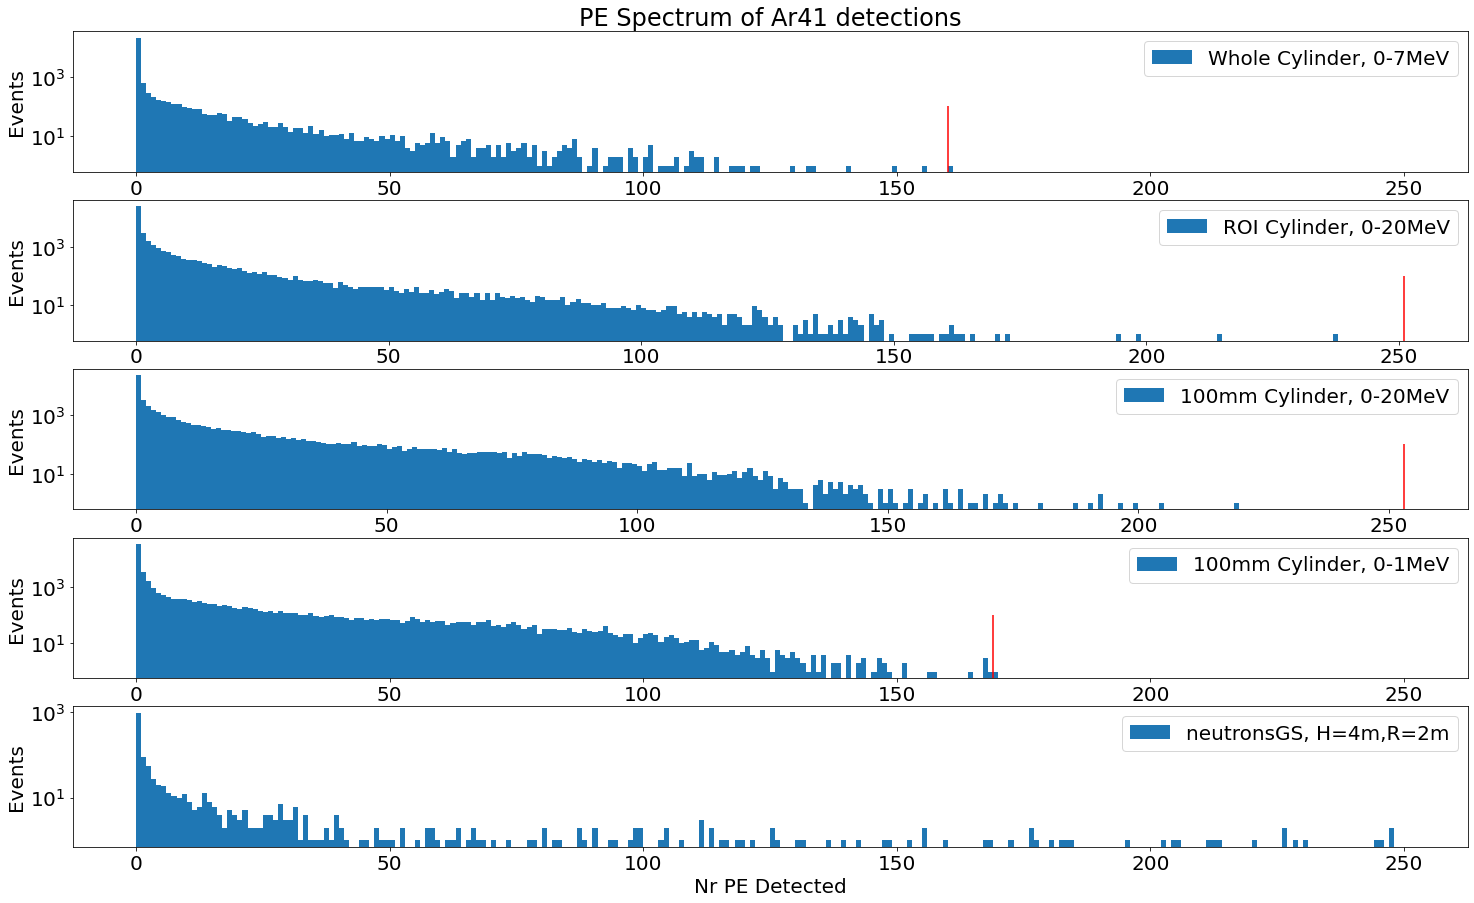

In [16]:
bins = np.linspace(0, 250, 251)
alpha=1
plt.subplot(5, 1, 1)
plt.title("PE Spectrum of Ar41 detections")
plt.hist(df_ar41_wholecylinder.groupby("eventnumber").pedetected.sum(), bins=bins, label="Whole Cylinder, 0-7MeV", alpha=alpha)
plt.vlines(df_ar41_wholecylinder.groupby("eventnumber").pedetected.sum().max(), 0, 100, color='r')
plt.legend()
plt.yscale("log")
plt.ylabel("Events")

plt.subplot(5, 1, 2)
plt.hist(df_ar41_ROIcylinder.groupby("eventnumber").pedetected.sum(), bins=bins, label="ROI Cylinder, 0-20MeV", alpha=alpha)
plt.vlines(df_ar41_ROIcylinder.groupby("eventnumber").pedetected.sum().max(), 0, 100, color='r')
plt.legend()
plt.yscale("log")
plt.ylabel("Events")

plt.subplot(5, 1, 3)
plt.hist(df_ar41_100cylinder.groupby("eventnumber").pedetected.sum(), bins=bins, label="100mm Cylinder, 0-20MeV", alpha=alpha)
plt.vlines(df_ar41_100cylinder.groupby("eventnumber").pedetected.sum().max(), 0, 100, color='r')
plt.legend()
plt.yscale("log")
plt.ylabel("Events")

plt.subplot(5, 1, 4)
plt.hist(df_ar41_100cylinder_01Mev.groupby("eventnumber").pedetected.sum(), bins=bins, label="100mm Cylinder, 0-1MeV", alpha=alpha)
plt.vlines(df_ar41_100cylinder_01Mev.groupby("eventnumber").pedetected.sum().max(), 0, 100, color='r')
plt.legend()
plt.yscale("log")
plt.ylabel("Events")

plt.subplot(5, 1, 5)
plt.hist(df_ar41_nGS.groupby("eventnumber").pedetected.sum(), bins=bins, label="neutronsGS, H=4m,R=2m", alpha=alpha)
#plt.vlines(df_ar41_nGS.groupby("eventnumber").pedetected.sum().max(), 0, 100, color='r')
plt.legend()
plt.yscale("log")
plt.xlabel("Nr PE Detected")
plt.ylabel("Events")
plt.show()

In [36]:
# Select 1st step of Ar41 particles (production step) for each event
df_onlyar41_wholecylinder = df_ar41_wholecylinder[df_ar41_wholecylinder.PID==1000180410].groupby(["eventnumber"]).first().reset_index()
df_onlyar41_ROIcylinder = df_ar41_ROIcylinder[df_ar41_ROIcylinder.PID==1000180410].groupby(["eventnumber"]).first().reset_index()
df_onlyar41_100cylinder = df_ar41_100cylinder[df_ar41_100cylinder.PID==1000180410].groupby(["eventnumber"]).first().reset_index()
df_onlyar41_100cylinder_01Mev = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.PID==1000180410].groupby(["eventnumber"]).first().reset_index()
df_onlyar41_nGS = df_ar41_nGS[df_ar41_nGS.PID==1000180410].groupby(["eventnumber"]).first().reset_index()
# compute the radial distance of the production point
radius_onlyar41_wholecylinder = (df_onlyar41_wholecylinder.x**2 + df_onlyar41_wholecylinder.y**2 + df_onlyar41_wholecylinder.z**2)**.5
radius_onlyar41_ROIcylinder = (df_onlyar41_ROIcylinder.x**2 + df_onlyar41_ROIcylinder.y**2 + df_onlyar41_ROIcylinder.z**2)**.5
radius_onlyar41_100cylinder = (df_onlyar41_100cylinder.x**2 + df_onlyar41_100cylinder.y**2 + df_onlyar41_100cylinder.z**2)**.5
radius_onlyar41_100cylinder_01Mev = (df_onlyar41_100cylinder_01Mev.x**2 + df_onlyar41_100cylinder_01Mev.y**2 + df_onlyar41_100cylinder_01Mev.z**2)**.5
radius_onlyar41_nGS = (df_onlyar41_nGS.x**2 + df_onlyar41_nGS.y**2 + df_onlyar41_nGS.z**2)**.5

In [37]:
# Select 1st step of Ar41 particles (production step) for each event
df_onlyNe_wholecylinder = df_ar41_wholecylinder[df_ar41_wholecylinder.PID==2112].groupby(["eventnumber"]).first().reset_index()
df_onlyNe_ROIcylinder = df_ar41_ROIcylinder[df_ar41_ROIcylinder.PID==2112].groupby(["eventnumber"]).first().reset_index()
df_onlyNe_100cylinder = df_ar41_100cylinder[df_ar41_100cylinder.PID==2112].groupby(["eventnumber"]).first().reset_index()
df_onlyNe_100cylinder_01Mev = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.PID==2112].groupby(["eventnumber"]).first().reset_index()
df_onlyNe_nGS = df_ar41_nGS[df_ar41_nGS.PID==2112].groupby(["eventnumber"]).first().reset_index()
# compute the radial distance of the production point
radius_onlyNe_wholecylinder = (df_onlyNe_wholecylinder.x**2 + df_onlyNe_wholecylinder.y**2 + df_onlyNe_wholecylinder.z**2)**.5
radius_onlyNe_ROIcylinder = (df_onlyNe_ROIcylinder.x**2 + df_onlyNe_ROIcylinder.y**2 + df_onlyNe_ROIcylinder.z**2)**.5
radius_onlyNe_100cylinder = (df_onlyNe_100cylinder.x**2 + df_onlyNe_100cylinder.y**2 + df_onlyNe_100cylinder.z**2)**.5
radius_onlyNe_nGS = (df_onlyNe_nGS.x**2 + df_onlyNe_nGS.y**2 + df_onlyNe_nGS.z**2)**.5

In [24]:
radius_onlyNe_100cylinder_01Mev = (df_onlyNe_100cylinder_01Mev.x**2 + df_onlyNe_100cylinder_01Mev.y**2 + df_onlyNe_100cylinder_01Mev.z**2)**.5

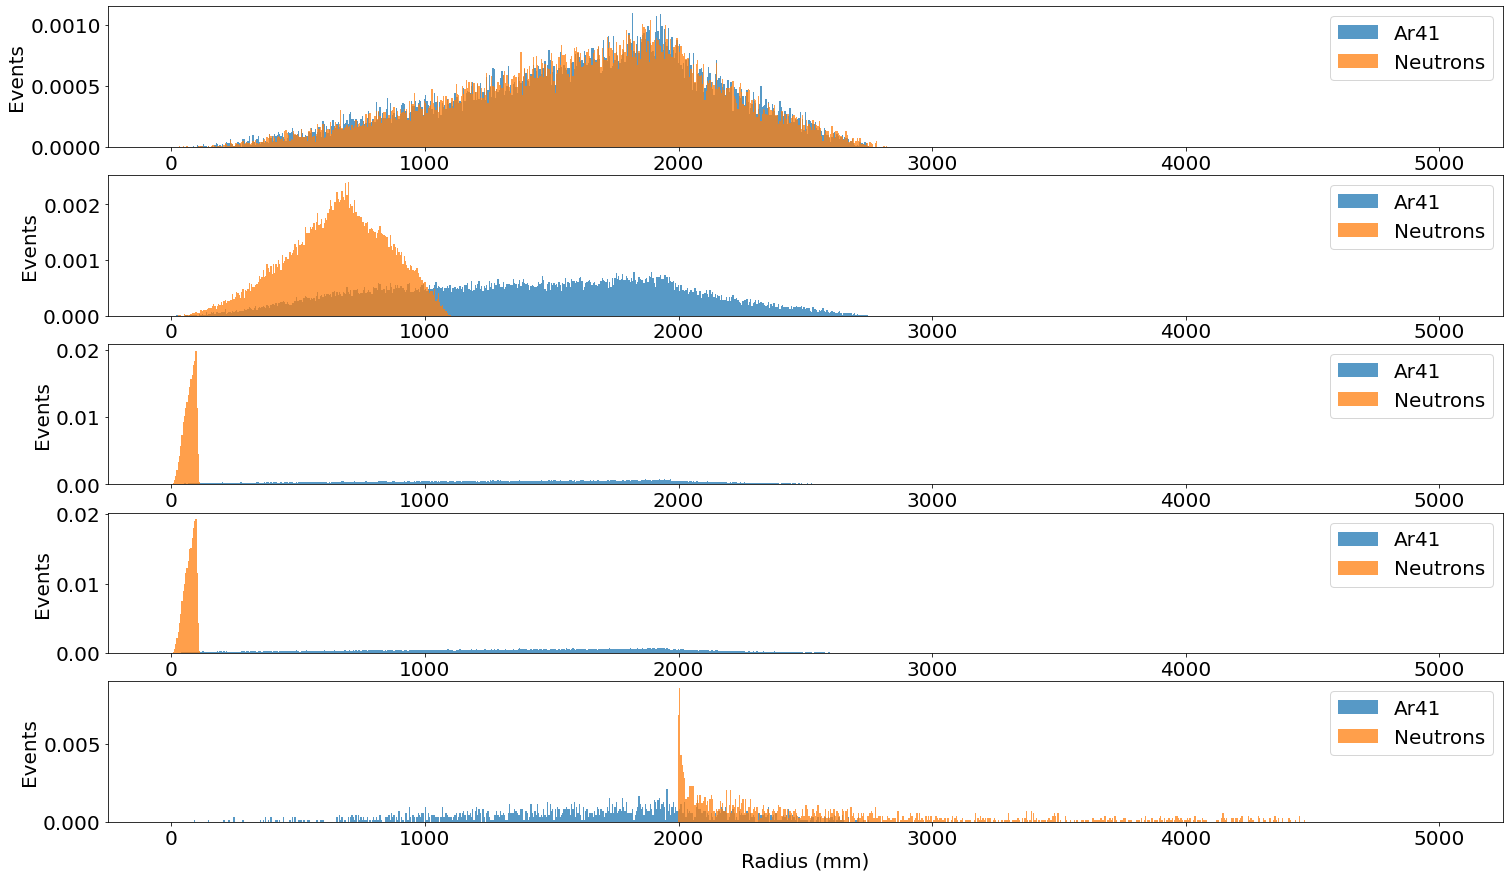

In [39]:
bins = np.linspace(0, 5000, 1000)
alpha=.75
plt.subplot(5, 1, 1)
#plt.title("Whole Cylinder, 0-7MeV")
plt.hist(radius_onlyar41_wholecylinder, bins=bins, label="Ar41", alpha=alpha, density=True)
plt.hist(radius_onlyNe_wholecylinder, bins=bins, label="Neutrons", alpha=alpha, density=True)
plt.legend()
plt.ylabel("Events")

plt.subplot(5, 1, 2)
#plt.title("ROI Cylinder, 0-20MeV")
plt.hist(radius_onlyar41_ROIcylinder, bins=bins, label="Ar41", alpha=alpha, density=True)
plt.hist(radius_onlyNe_ROIcylinder, bins=bins, label="Neutrons", alpha=alpha, density=True)
plt.legend()
plt.ylabel("Events")

plt.subplot(5, 1, 3)
#plt.title("100mm Cylinder, 0-20MeV")
plt.hist(radius_onlyar41_100cylinder, bins=bins, label="Ar41", alpha=alpha, density=True)
plt.hist(radius_onlyNe_100cylinder, bins=bins, label="Neutrons", alpha=alpha, density=True)
plt.legend()
plt.ylabel("Events")

plt.subplot(5, 1, 4)
#plt.title("100mm Cylinder, 0-1MeV")
plt.hist(radius_onlyar41_100cylinder_01Mev, bins=bins, label="Ar41", alpha=alpha, density=True)
plt.hist(radius_onlyNe_100cylinder_01Mev, bins=bins, label="Neutrons", alpha=alpha, density=True)
plt.legend()
plt.ylabel("Events")

plt.subplot(5, 1, 5)
#plt.title("100mm Cylinder, 0-1MeV")
plt.hist(radius_onlyar41_nGS, bins=bins, label="Ar41", alpha=alpha, density=True)
plt.hist(radius_onlyNe_nGS, bins=bins, label="Neutrons", alpha=alpha, density=True)
plt.legend()
plt.xlabel("Radius (mm)")
plt.ylabel("Events")
plt.show()


In [44]:
radius_onlyar41_ROIcylinder.describe()

count    38549.000000
mean      1880.686298
std       3390.238747
min         21.116085
25%        982.860923
50%       1461.981747
75%       1881.005584
max      34359.131889
dtype: float64

In [45]:
radius_onlyar41_nGS.describe()

count     1491.000000
mean      2686.116482
std       4947.900521
min         94.508992
25%       1355.096078
50%       1756.465783
75%       2066.330699
max      32368.159987
dtype: float64

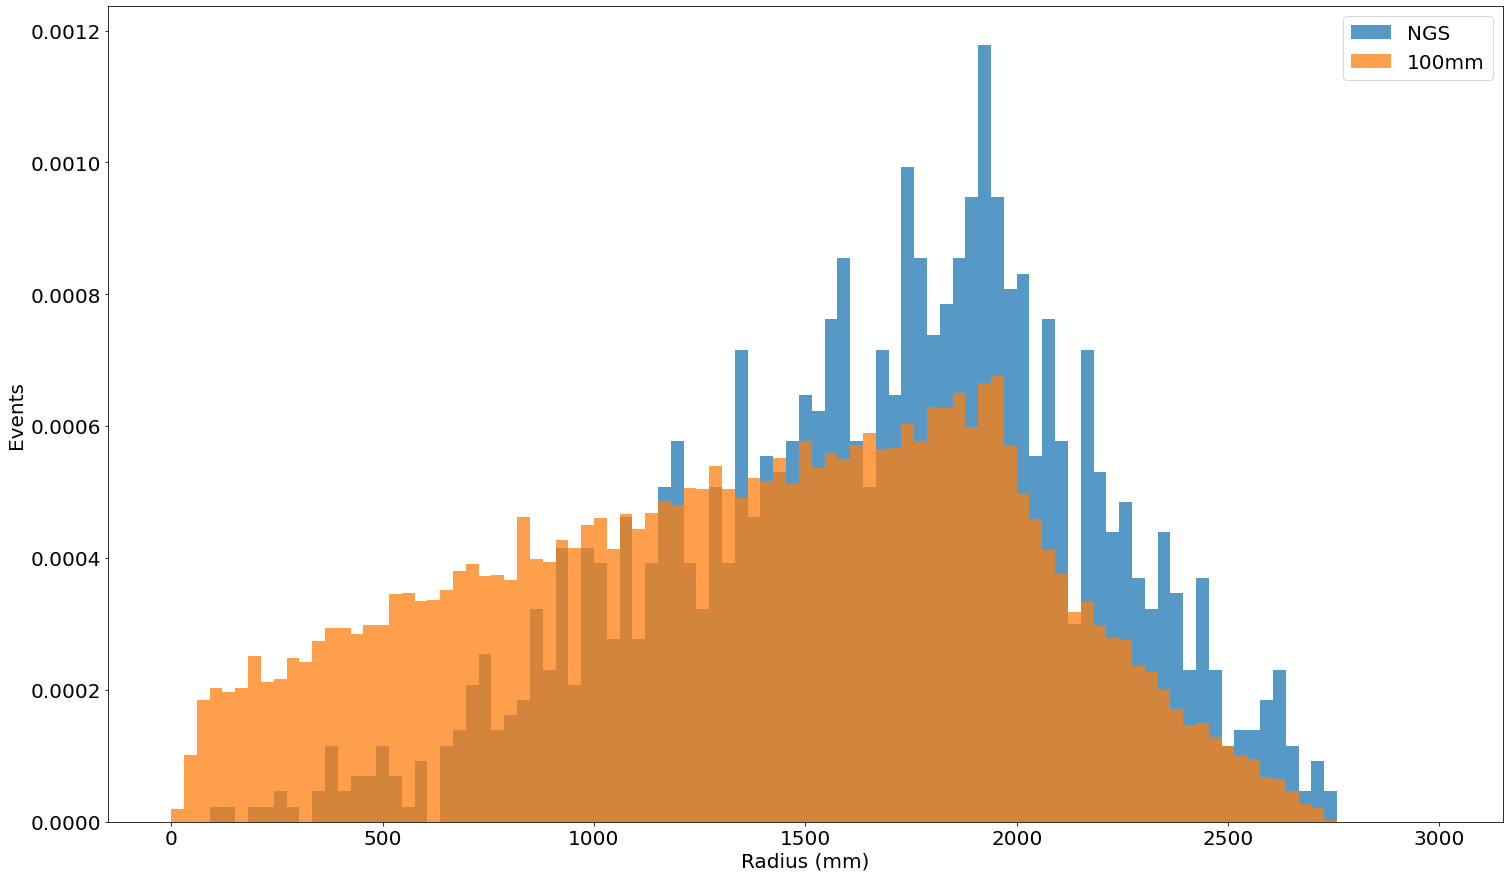

In [49]:
bins = np.linspace(0, 3000, 100)
plt.hist(radius_onlyar41_nGS, bins=bins, label="NGS", alpha=alpha, density=True)
plt.hist(radius_onlyar41_100cylinder, bins=bins, label="100mm", alpha=alpha, density=True)
plt.legend()
plt.xlabel("Radius (mm)")
plt.ylabel("Events")
plt.show()

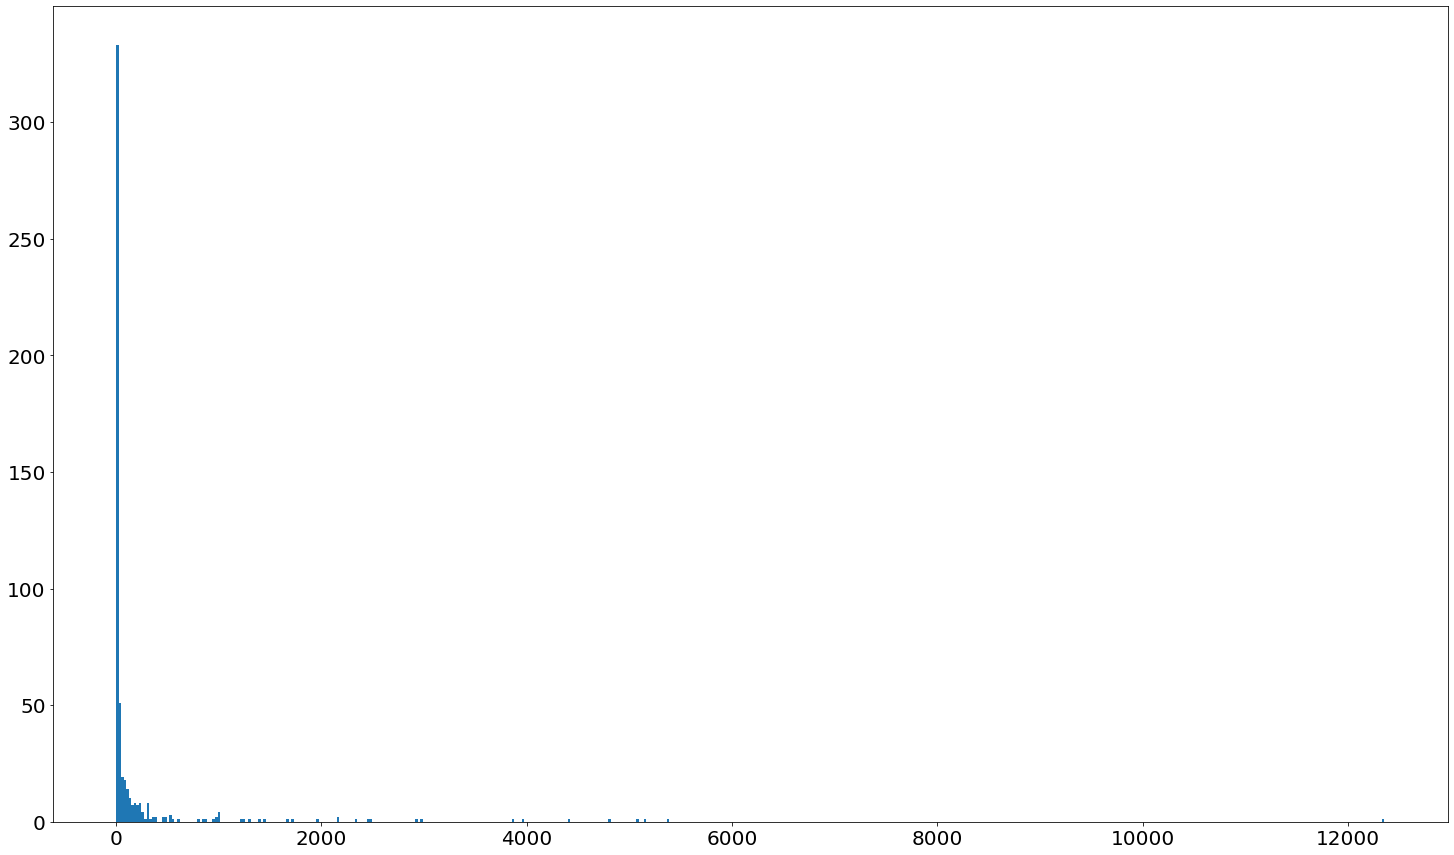

In [52]:
ngs_pe_gbyevent = df_ar41_nGS.groupby("eventnumber").pedetected.sum()
plt.hist(ngs_pe_gbyevent[ngs_pe_gbyevent>0], bins=500)
plt.show()

In [55]:
ngs_pe_gbyevent[ngs_pe_gbyevent>10].describe()

count      273.000000
mean       398.131868
std       1120.543128
min         11.000000
25%         25.000000
50%         66.000000
75%        220.000000
max      12354.000000
Name: pedetected, dtype: float64

In [58]:
df_ar41_nGS.groupby("eventnumber").pedetected.sum()[df_ar41_nGS.groupby("eventnumber").pedetected.sum()>100]

eventnumber
2355     2335
4572      111
7586      152
8446      202
9705      469
         ... 
96806     487
96891     616
98184     204
98342     111
99474     303
Name: pedetected, Length: 114, dtype: int64

In [ ]:
df_ar41_nGS[df_ar41_nGS.eventnumber]